# **Pandas:**

In [2]:
import pandas as pd

## Estrucuturas de datos

Pandas utiliza un tipo de dato llamado serie, es una mezcla entre listas y diccionarios, este estructura le asigna un indice a cada elemento representandolo en 2 columnas

In [3]:
students = ["Ale","Pablo", "alicia"]

pd.Series(students)

0       Ale
1     Pablo
2    alicia
dtype: object

In [4]:
########### Asignacion a valores None
students = ["Ale","Pablo", "alicia", None]
pd.Series(students)


0       Ale
1     Pablo
2    alicia
3      None
dtype: object

In [5]:
########### Asignacion a valores None
students = [0,1,2,3,1,2,None]
pd.Series(students)
### Si el dtype de una serie es float es probable que sea por la falta de algun dato


0    0.0
1    1.0
2    2.0
3    3.0
4    1.0
5    2.0
6    NaN
dtype: float64

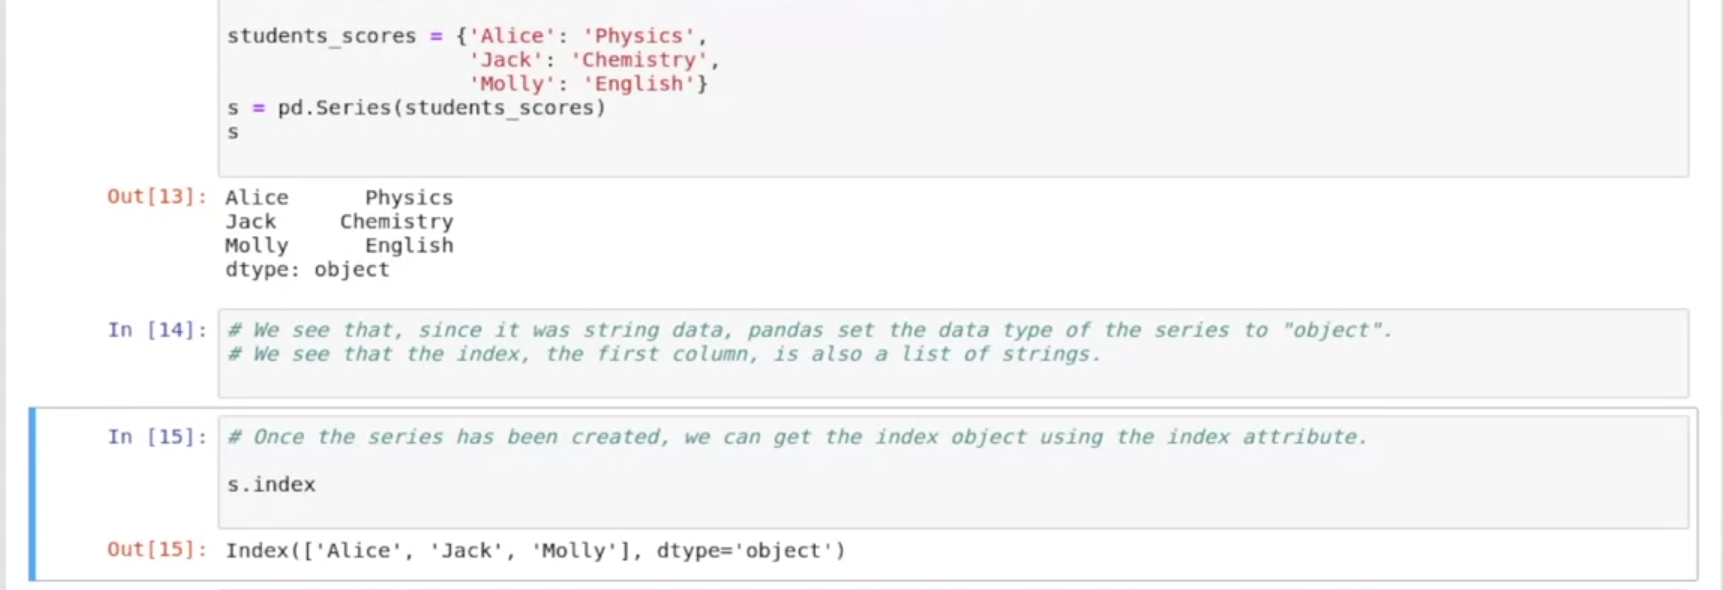

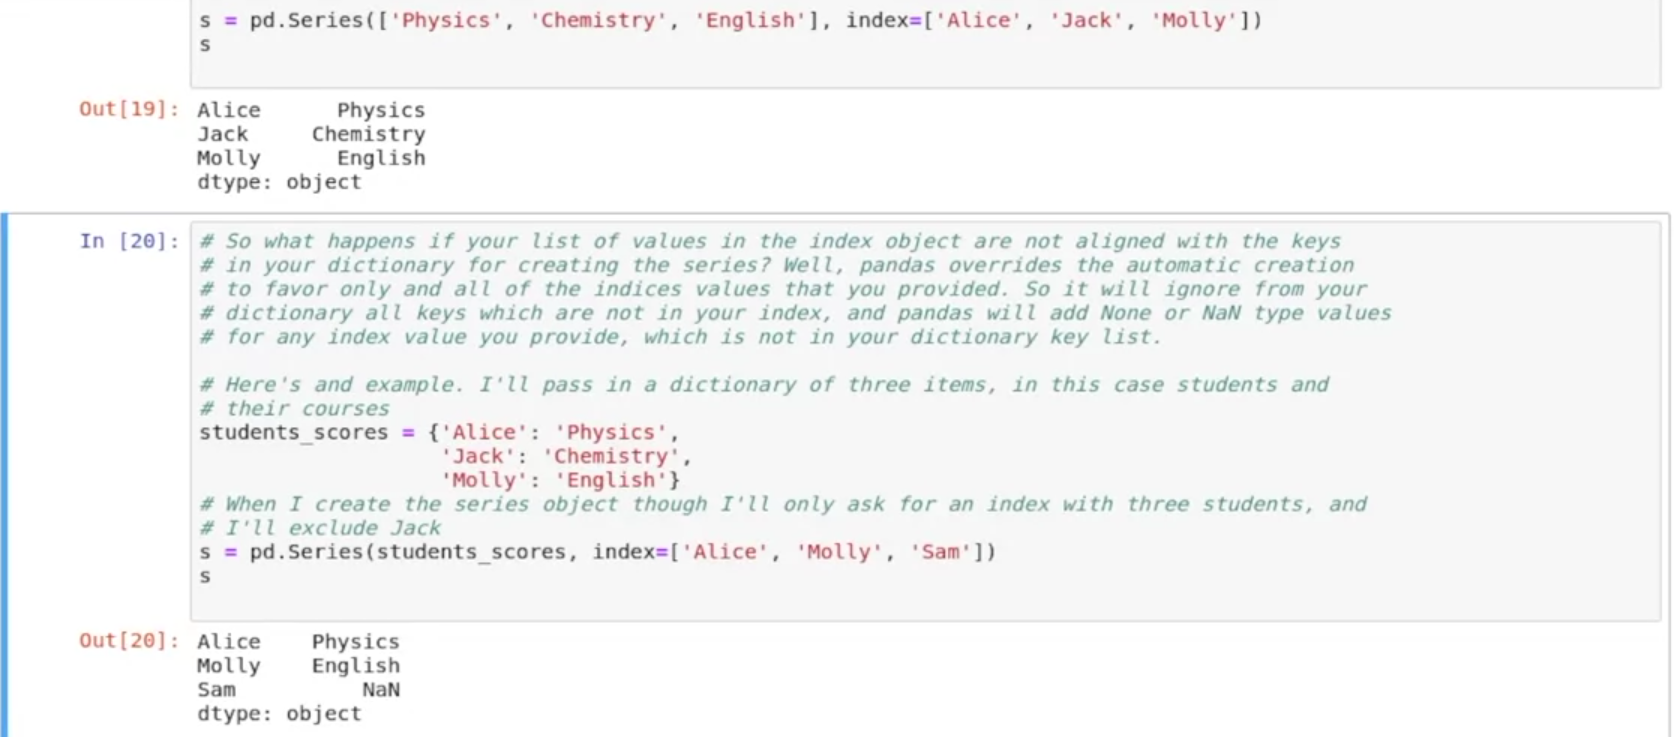

In [6]:
student_classes = {"Alice":"fisica", "Pepe":"Math", "Sam":"Historia"}

s = pd.Series(student_classes)
s.iloc[0]


'fisica'

In [7]:
s["Alice"]

'fisica'

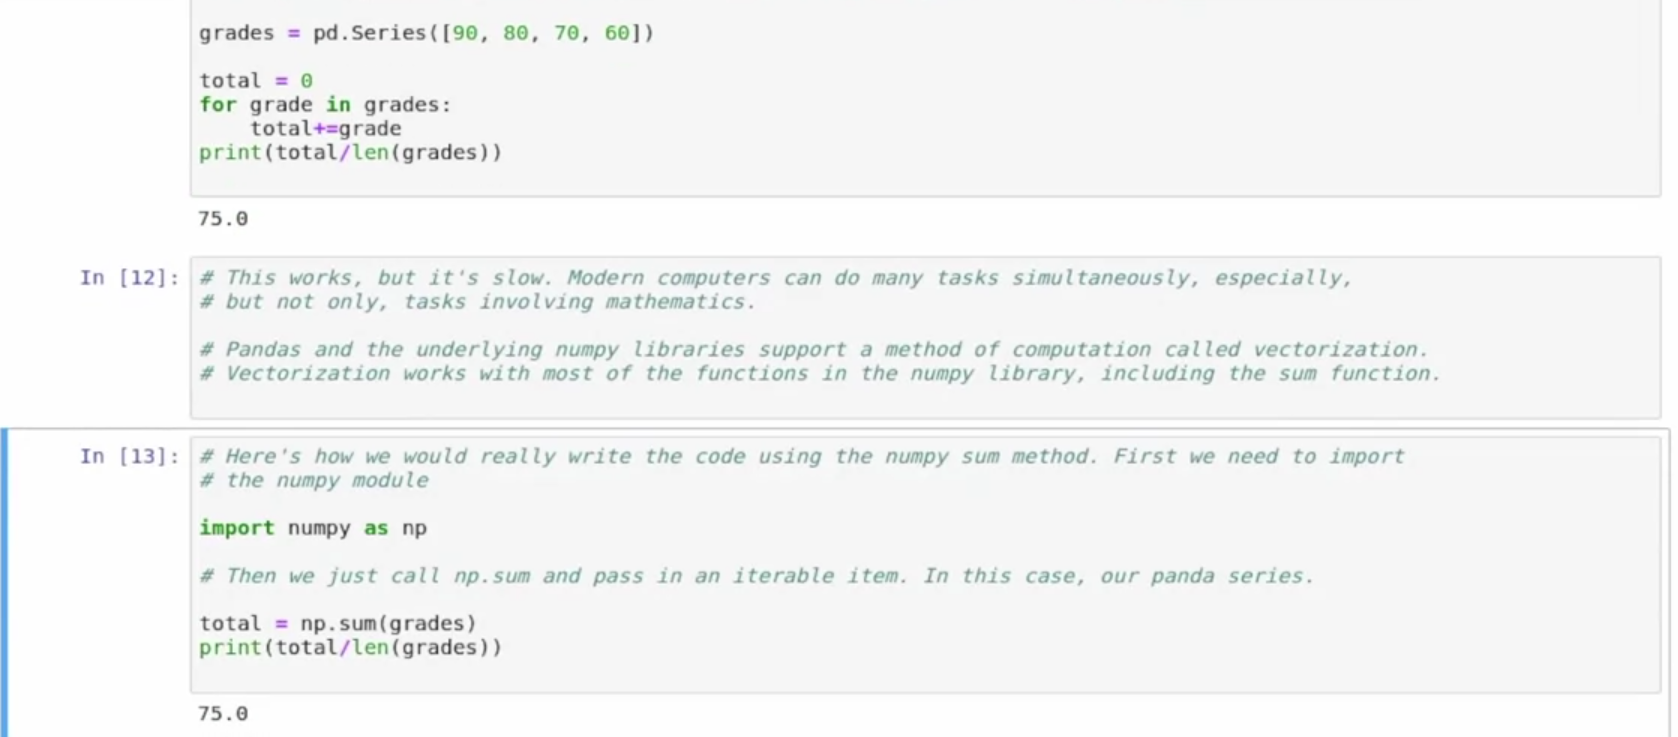

In [8]:
grades = pd.Series([90,80,70,60])
total = 0
for i in grades:
    total += i
final = total/len(grades)
final

75.0

## El siguiente metodo es mucho mas eficiente

In [9]:
import numpy as np

total = np.sum(grades)

total/len(grades)

75.0

In [10]:
larga = pd.Series(np.random.randint(0,1000000,10000000))

In [11]:
%%timeit -n 10


total = 0
for i in larga:
    total += i
final = total/len(larga)
final

KeyboardInterrupt: 

In [ ]:
%%timeit -n 1000

total = np.sum(larga)

final = total/len(larga)
final

#### la vectorizacion permite utilizar la capacidad de computo de la tarjeta grafica lo que permite que los calculos se hagan mucho mas rapido 

3.98 ms ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
larga

larga += 2 ### Se aplica a todos los elementos de la Serie 
larga

0          285126
1          507032
2          693045
3          277247
4          693628
            ...  
9999995    299599
9999996    620987
9999997    632997
9999998    342817
9999999    776077
Length: 10000000, dtype: int64

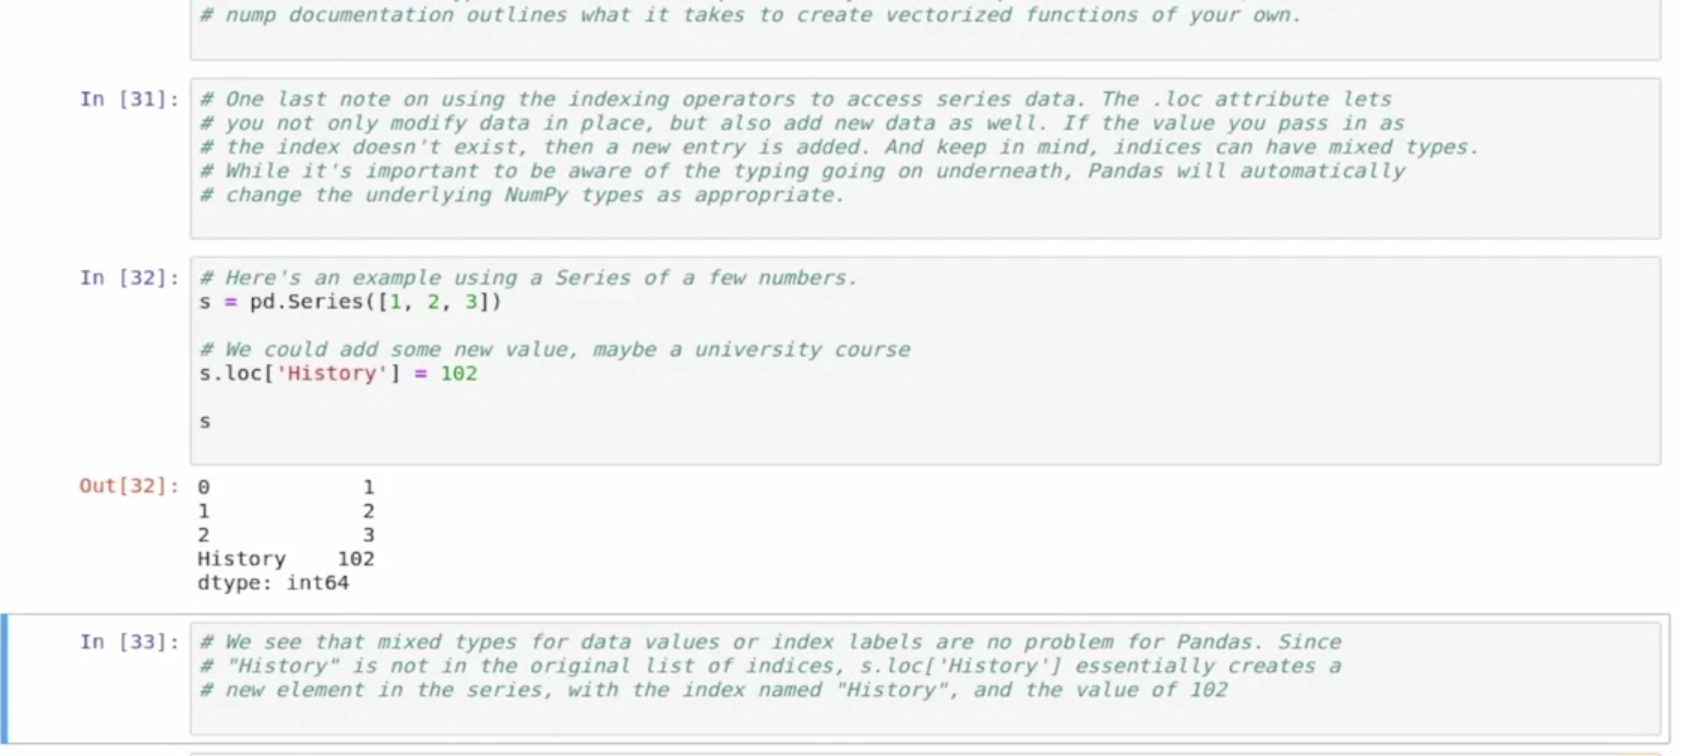

## **DataFrame:** 

In [ ]:
# Los dataFrames nos permite unir Series de tal forma que todo este unido en una unica matriz

record1 = pd.Series({"Nombre":"Alejandro",
                     "Clase":"historia",
                     "Nota":4})

record2 = pd.Series({"Nombre":"Pepe",
                     "Clase":"algebra",
                     "Nota":3})

record3 = pd.Series({"Nombre":"Laura",
                     "Clase":"mate",
                     "Nota":5})

df = pd.DataFrame([record1,record2,record3],index=["escuela1", "escuela1","Escuela3"])
df

Nombre     Clase  Nota
escuela1  Alejandro  historia     4
escuela1       Pepe   algebra     3
Escuela3      Laura      mate     5

In [ ]:
df.loc["escuela1"]
df.iloc[0]

Nombre    True
Clase     True
Nota      True
Name: escuela1, dtype: bool

In [ ]:
df.loc["escuela1","Nombre"] #Podemos realizar la busqueda con la columna y la fila


escuela1    Alejandro
escuela1         Pepe
Name: Nombre, dtype: object

In [ ]:
# Podemos trasnponer la matriz por medio del atributo T, lo que nos permite acceder a todos los elementos de una columna que ahora se ha convertido en una fila

newdf = df.T

newdf.loc["Nota"] ## loc siempre debe recibir primero el nombre de la fila deseada

escuela1    4
escuela1    3
Escuela3    5
Name: Nota, dtype: object

In [ ]:
### una forma mas facill de acceder a los elementos de una columna es por medio de.

df["Nombre"]

escuela1    Alejandro
escuela1         Pepe
Escuela3        Laura
Name: Nombre, dtype: object

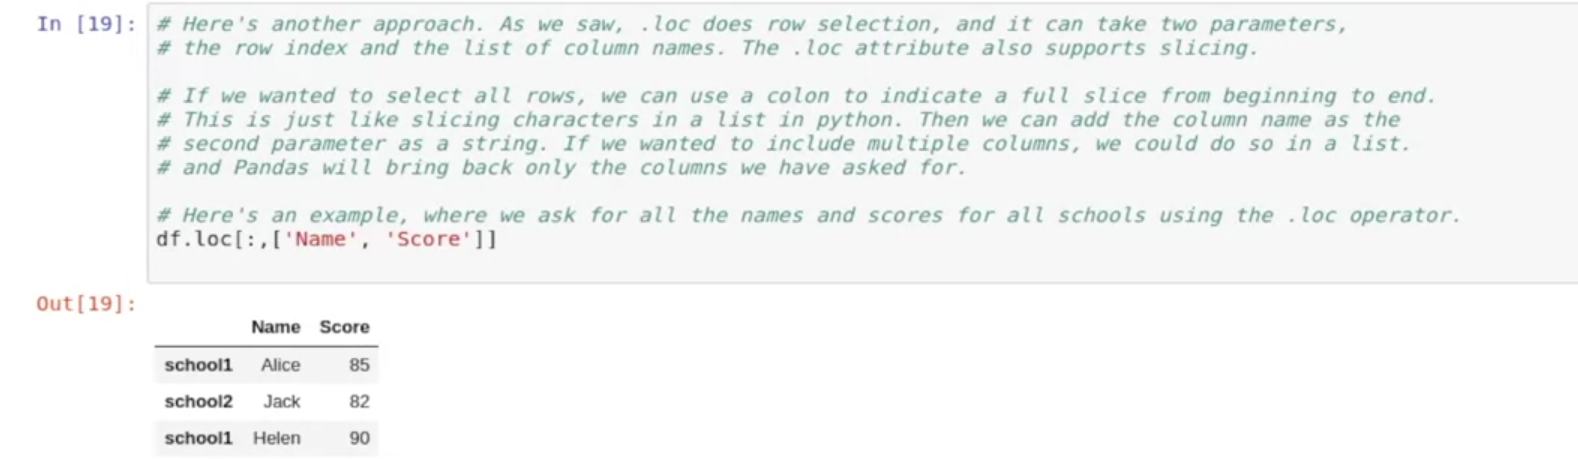

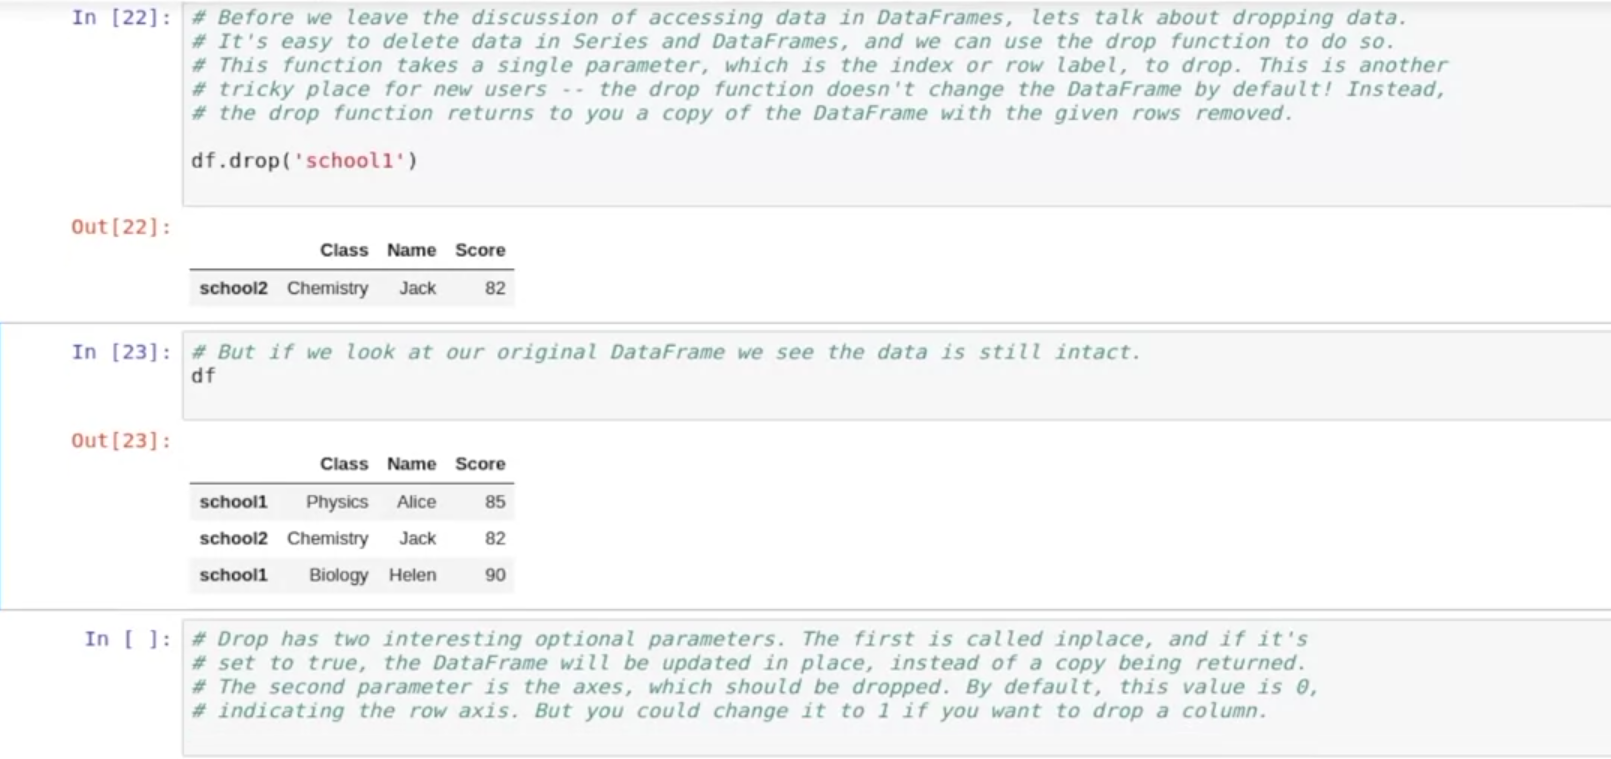

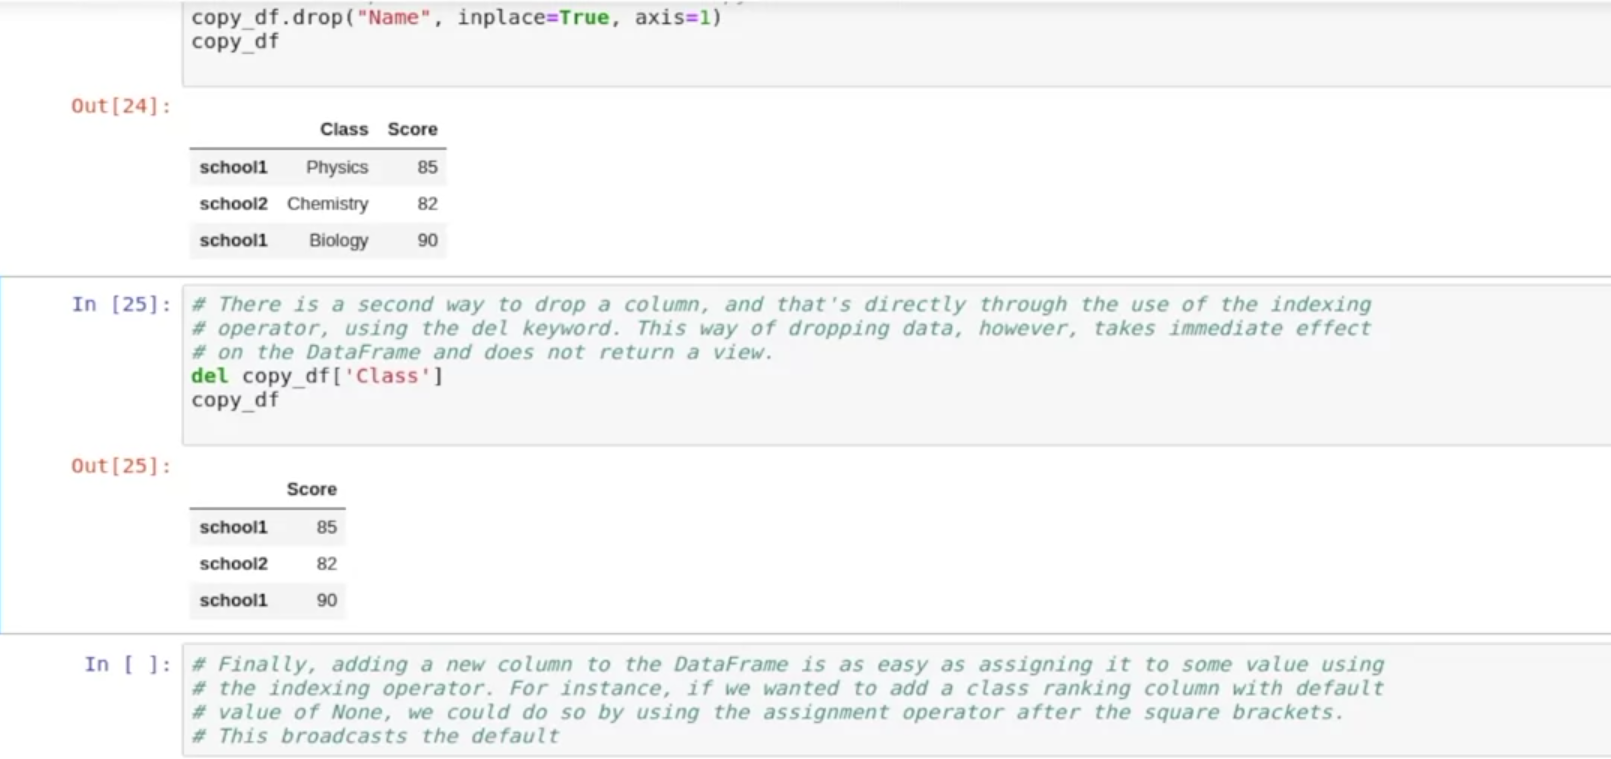

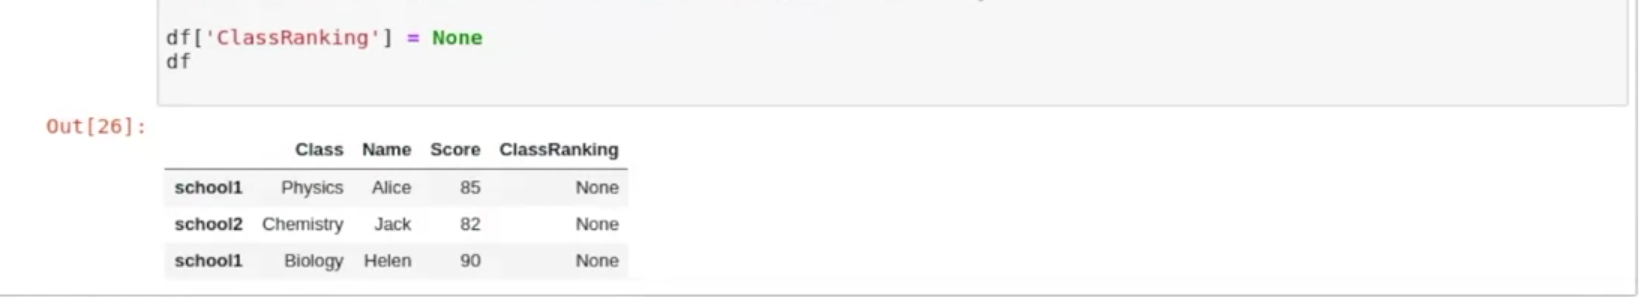

# **Index and loading:**

In [14]:
df = pd.read_csv("/home/ptro/Code/un/TLP/Curso/code/week1/Admission_Predict.csv")

df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

In [17]:
df = pd.read_csv("/home/ptro/Code/un/TLP/Curso/code/week1/Admission_Predict.csv",index_col=0)
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   

            Research  Chance of Admit   
Serial No.                              
1                  1              0.92  
2                  1              0.76  
3                  1              0.72  
4                  1              0.80  
5                  0              0.65

In [22]:


new_df = df.rename(columns={"GRE Score": "GRE Score", "TOEFL Score":"TOEFL Score", "University Rating":"University Rating","SOP":"Statement of Purpose", "LOR ":"Letter of Recommendation", "CGPA":"CGPA","Research":"Research", "Chance of Admit ":"Chance of Admit"})
new_df.head()

GRE Score  TOEFL Score  University Rating  Statement of Purpose  \
Serial No.                                                                    
1                 337          118                  4                   4.5   
2                 324          107                  4                   4.0   
3                 316          104                  3                   3.0   
4                 322          110                  3                   3.5   
5                 314          103                  2                   2.0   

            Letter of Recommendation  CGPA  Research  Chance of Admit  
Serial No.                                                             
1                                4.5  9.65         1             0.92  
2                                4.5  8.87         1             0.76  
3                                3.5  8.00         1             0.72  
4                                2.5  8.67         1             0.80  
5                                3.0  8.21         0             0.65

In [25]:
df.columns
new_df = new_df.rename(mapper=str.strip,axis="columns")

In [26]:
new_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose',
       'Letter of Recommendation', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

## Modificar el nombre de las columnas 

In [30]:
cols = list(df.columns)
cols = [x.lower().strip() for x in cols]
cols
df.columns = cols

In [31]:
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

## **Querying:**

In [32]:
df.head()

gre score  toefl score  university rating  sop  lor  cgpa  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            research  chance of admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65

In [34]:
### Aplicar una boolean mask a un dataframe
admit_mask = df["chance of admit"] > 0.7
admit_mask

Serial No.
1       True
2       True
3       True
4       True
5      False
       ...  
396     True
397     True
398     True
399    False
400     True
Name: chance of admit, Length: 400, dtype: bool

In [35]:

## Elimina los datos que contienen el false en el admit_mask 
df.where(admit_mask)

gre score  toefl score  university rating  sop  lor  cgpa  \
Serial No.                                                              
1               337.0        118.0                4.0  4.5  4.5  9.65   
2               324.0        107.0                4.0  4.0  4.5  8.87   
3               316.0        104.0                3.0  3.0  3.5  8.00   
4               322.0        110.0                3.0  3.5  2.5  8.67   
5                 NaN          NaN                NaN  NaN  NaN   NaN   
...               ...          ...                ...  ...  ...   ...   
396             324.0        110.0                3.0  3.5  3.5  9.04   
397             325.0        107.0                3.0  3.0  3.5  9.11   
398             330.0        116.0                4.0  5.0  4.5  9.45   
399               NaN          NaN                NaN  NaN  NaN   NaN   
400             333.0        117.0                4.0  5.0  4.0  9.66   

            research  chance of admit  
Serial No.                             
1                1.0             0.92  
2                1.0             0.76  
3                1.0             0.72  
4                1.0             0.80  
5                NaN              NaN  
...              ...              ...  
396              1.0             0.82  
397              1.0             0.84  
398              1.0             0.91  
399              NaN              NaN  
400              1.0             0.95  

[400 rows x 8 columns]

In [36]:
##### la forma de eliminar los valores vacios es por medio de: drop.na()

df.where(admit_mask).dropna()

gre score  toefl score  university rating  sop  lor  cgpa  \
Serial No.                                                              
1               337.0        118.0                4.0  4.5  4.5  9.65   
2               324.0        107.0                4.0  4.0  4.5  8.87   
3               316.0        104.0                3.0  3.0  3.5  8.00   
4               322.0        110.0                3.0  3.5  2.5  8.67   
6               330.0        115.0                5.0  4.5  3.0  9.34   
...               ...          ...                ...  ...  ...   ...   
395             329.0        111.0                4.0  4.5  4.0  9.23   
396             324.0        110.0                3.0  3.5  3.5  9.04   
397             325.0        107.0                3.0  3.0  3.5  9.11   
398             330.0        116.0                4.0  5.0  4.5  9.45   
400             333.0        117.0                4.0  5.0  4.0  9.66   

            research  chance of admit  
Serial No.                             
1                1.0             0.92  
2                1.0             0.76  
3                1.0             0.72  
4                1.0             0.80  
6                1.0             0.90  
...              ...              ...  
395              1.0             0.89  
396              1.0             0.82  
397              1.0             0.84  
398              1.0             0.91  
400              1.0             0.95  

[235 rows x 8 columns]

In [43]:
## La forma mas practica de hacer lo anterior es:
## La forma mas practica de hacer lo anterior es:
df_menor = df[df["chance of admit"]<0.7]

df_mayor = df[df["chance of admit"]>0.7]

df_mayor

gre score  toefl score  university rating  sop  lor  cgpa  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
6                 330          115                  5  4.5  3.0  9.34   
...               ...          ...                ...  ...  ...   ...   
395               329          111                  4  4.5  4.0  9.23   
396               324          110                  3  3.5  3.5  9.04   
397               325          107                  3  3.0  3.5  9.11   
398               330          116                  4  5.0  4.5  9.45   
400               333          117                  4  5.0  4.0  9.66   

            research  chance of admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
6                  1             0.90  
...              ...              ...  
395                1             0.89  
396                1             0.82  
397                1             0.84  
398                1             0.91  
400                1             0.95  

[235 rows x 8 columns]

In [45]:
df_mayor["gre score"].mean()
#df_menor["gre score"].mean()


323.20425531914896

In [53]:
######### Para hacer comparaciones en series de pandas se debe utilizar los elementos | y &&

(df["chance of admit"]>0.70) & (df['chance of admit']<0.90) # Se debe tener especial cuidado con el lugar de los parentesis

Serial No.
1      False
2       True
3       True
4       True
5      False
       ...  
396     True
397     True
398    False
399    False
400    False
Name: chance of admit, Length: 400, dtype: bool

In [56]:
# Tambien se puede utilizar 

df["chance of admit"].lt(0.9).gt(0.7)

Serial No.
1      False
2       True
3       True
4       True
5       True
       ...  
396     True
397     True
398    False
399     True
400    False
Name: chance of admit, Length: 400, dtype: bool

# **Indexign:**

In [117]:
df

sumlev  region  division  state  county   stname            ctyname  \
0         40       3         6      1       0  Alabama            Alabama   
1         50       3         6      1       1  Alabama     Autauga County   
2         50       3         6      1       3  Alabama     Baldwin County   
3         50       3         6      1       5  Alabama     Barbour County   
4         50       3         6      1       7  Alabama        Bibb County   
...      ...     ...       ...    ...     ...      ...                ...   
3188      50       4         8     56      37  Wyoming  Sweetwater County   
3189      50       4         8     56      39  Wyoming       Teton County   
3190      50       4         8     56      41  Wyoming       Uinta County   
3191      50       4         8     56      43  Wyoming    Washakie County   
3192      50       4         8     56      45  Wyoming      Weston County   

      census2010pop  estimatesbase2010  popestimate2010  ...  \
0           4779736            4780127          4785161  ...   
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      rdomesticmig2011  rdomesticmig2012  rdomesticmig2013  rdomesticmig2014  \
0             0.002295         -0.193196          0.381066          0.582002   
1             7.242091         -2.915927         -3.012349          2.265971   
2            14.832960         17.647293         21.845705         19.243287   
3            -4.728132         -2.500690         -7.056824         -3.904217   
4            -5.527043         -5.068871         -6.201001         -0.177537   
...                ...               ...               ...               ...   
3188          1.072643         16.243199         -5.339774        -14.252889   
3189         -1.589565          0.972695         19.525929         14.143021   
3190        -17.755986         -4.916350         -6.902954        -14.215862   
3191        -11.637475         -0.827815         -2.013502        -17.781491   
3192        -11.752361         -8.040059         12.372583          1.533635   

      rdomesticmig2015  rnetmig2011  rnetmig2012  rnetmig2013  rnetmig2014  \
0            -0.467369     1.030015     0.826644     1.383282     1.724718   
1            -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2            17.197872    15.844176    18.559627    22.727626    20.317142   
3           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
...                ...          ...          ...          ...          ...   
3188        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3189         -0.564849     0.654527     2.408578    21.160658    16.308671   
3190        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3191          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3192          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      rnetmig2015  
0        0.712594  
1       -2.187333  
2       18.293499  
3      -10.543299  
4        1.107861  
...           ...  
3188   -14.070195  
3189     1.520747  
3190   -12.606351  
3191     1.441961  
3192     6.935294  

[3193 rows x 100 columns]

In [118]:
df = pd.read_csv("census.csv")
cols1 = list(df.columns)
cols1 = [x.lower().strip() for x in cols1]
df.columns = cols1
df.columns

Index(['sumlev', 'region', 'division', 'state', 'county', 'stname', 'ctyname',
       'census2010pop', 'estimatesbase2010', 'popestimate2010',
       'popestimate2011', 'popestimate2012', 'popestimate2013',
       'popestimate2014', 'popestimate2015', 'npopchg_2010', 'npopchg_2011',
       'npopchg_2012', 'npopchg_2013', 'npopchg_2014', 'npopchg_2015',
       'births2010', 'births2011', 'births2012', 'births2013', 'births2014',
       'births2015', 'deaths2010', 'deaths2011', 'deaths2012', 'deaths2013',
       'deaths2014', 'deaths2015', 'naturalinc2010', 'naturalinc2011',
       'naturalinc2012', 'naturalinc2013', 'naturalinc2014', 'naturalinc2015',
       'internationalmig2010', 'internationalmig2011', 'internationalmig2012',
       'internationalmig2013', 'internationalmig2014', 'internationalmig2015',
       'domesticmig2010', 'domesticmig2011', 'domesticmig2012',
       'domesticmig2013', 'domesticmig2014', 'domesticmig2015', 'netmig2010',
       'netmig2011', 'netmig2012', 'netmi

In [119]:
df.head()

sumlev  region  division  state  county   stname         ctyname  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

   census2010pop  estimatesbase2010  popestimate2010  ...  rdomesticmig2011  \
0        4779736            4780127          4785161  ...          0.002295   
1          54571              54571            54660  ...          7.242091   
2         182265             182265           183193  ...         14.832960   
3          27457              27457            27341  ...         -4.728132   
4          22915              22919            22861  ...         -5.527043   

   rdomesticmig2012  rdomesticmig2013  rdomesticmig2014  rdomesticmig2015  \
0         -0.193196          0.381066          0.582002         -0.467369   
1         -2.915927         -3.012349          2.265971         -2.530799   
2         17.647293         21.845705         19.243287         17.197872   
3         -2.500690         -7.056824         -3.904217        -10.543299   
4         -5.068871         -6.201001         -0.177537          0.177258   

   rnetmig2011  rnetmig2012  rnetmig2013  rnetmig2014  rnetmig2015  
0     1.030015     0.826644     1.383282     1.724718     0.712594  
1     7.606016    -2.626146    -2.722002     2.592270    -2.187333  
2    15.844176    18.559627    22.727626    20.317142    18.293499  
3    -4.874741    -2.758113    -7.167664    -3.978583   -10.543299  
4    -5.088389    -4.363636    -5.403729     0.754533     1.107861  

[5 rows x 100 columns]

In [120]:
#Esto nos muestra una lista de todos los valores de la columna deseada
df["sumlev"].unique()

array([40, 50])

In [121]:
df  = df[df["sumlev"]==50]
df

sumlev  region  division  state  county   stname            ctyname  \
1         50       3         6      1       1  Alabama     Autauga County   
2         50       3         6      1       3  Alabama     Baldwin County   
3         50       3         6      1       5  Alabama     Barbour County   
4         50       3         6      1       7  Alabama        Bibb County   
5         50       3         6      1       9  Alabama      Blount County   
...      ...     ...       ...    ...     ...      ...                ...   
3188      50       4         8     56      37  Wyoming  Sweetwater County   
3189      50       4         8     56      39  Wyoming       Teton County   
3190      50       4         8     56      41  Wyoming       Uinta County   
3191      50       4         8     56      43  Wyoming    Washakie County   
3192      50       4         8     56      45  Wyoming      Weston County   

      census2010pop  estimatesbase2010  popestimate2010  ...  \
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
5             57322              57322            57373  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      rdomesticmig2011  rdomesticmig2012  rdomesticmig2013  rdomesticmig2014  \
1             7.242091         -2.915927         -3.012349          2.265971   
2            14.832960         17.647293         21.845705         19.243287   
3            -4.728132         -2.500690         -7.056824         -3.904217   
4            -5.527043         -5.068871         -6.201001         -0.177537   
5             1.807375         -1.177622         -1.748766         -2.062535   
...                ...               ...               ...               ...   
3188          1.072643         16.243199         -5.339774        -14.252889   
3189         -1.589565          0.972695         19.525929         14.143021   
3190        -17.755986         -4.916350         -6.902954        -14.215862   
3191        -11.637475         -0.827815         -2.013502        -17.781491   
3192        -11.752361         -8.040059         12.372583          1.533635   

      rdomesticmig2015  rnetmig2011  rnetmig2012  rnetmig2013  rnetmig2014  \
1            -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2            17.197872    15.844176    18.559627    22.727626    20.317142   
3           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
5            -1.369970     1.859511    -0.848580    -1.402476    -1.577232   
...                ...          ...          ...          ...          ...   
3188        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3189         -0.564849     0.654527     2.408578    21.160658    16.308671   
3190        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3191          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3192          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      rnetmig2015  
1       -2.187333  
2       18.293499  
3      -10.543299  
4        1.107861  
5       -0.884411  
...           ...  
3188   -14.070195  
3189     1.520747  
3190   -12.606351  
3191     1.441961  
3192     6.935294  

[3142 rows x 100 columns]

In [122]:
columns_to_keep = ['STNAME','CTYNAME','BIRTHS2010','BIRTHS2011','BIRTHS2012','BIRTHS2013','BIRTHS2014','BIRTHS2015','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']

columns_to_keep = [x.lower() for x in columns_to_keep]

df = df[columns_to_keep]
df

stname            ctyname  births2010  births2011  births2012  \
1     Alabama     Autauga County         151         636         615   
2     Alabama     Baldwin County         517        2187        2092   
3     Alabama     Barbour County          70         335         300   
4     Alabama        Bibb County          44         266         245   
5     Alabama      Blount County         183         744         710   
...       ...                ...         ...         ...         ...   
3188  Wyoming  Sweetwater County         167         640         595   
3189  Wyoming       Teton County          76         259         230   
3190  Wyoming       Uinta County          73         324         311   
3191  Wyoming    Washakie County          26         108          90   
3192  Wyoming      Weston County          26          81          74   

      births2013  births2014  births2015  popestimate2010  popestimate2011  \
1            574         623         600            54660            55253   
2           2160        2186        2240           183193           186659   
3            283         260         269            27341            27226   
4            259         247         253            22861            22733   
5            646         618         603            57373            57711   
...          ...         ...         ...              ...              ...   
3188         657         629         620            43593            44041   
3189         261         249         269            21297            21482   
3190         316         316         316            21102            20912   
3191          95          96          90             8545             8469   
3192          93          77          79             7181             7114   

      popestimate2012  popestimate2013  popestimate2014  popestimate2015  
1               55175            55038            55290            55347  
2              190396           195126           199713           203709  
3               27159            26973            26815            26489  
4               22642            22512            22549            22583  
5               57776            57734            57658            57673  
...               ...              ...              ...              ...  
3188            45104            45162            44925            44626  
3189            21697            22347            22905            23125  
3190            20989            21022            20903            20822  
3191             8443             8443             8316             8328  
3192             7065             7160             7185             7234  

[3142 rows x 14 columns]

In [123]:
#Ahora hemos definido los indicies por lo tanto todos los elementos podran ser accesador por medio de stname y luego ctyname

df = df.set_index(["stname","ctyname"])


In [128]:
df.head()


births2010  births2011  births2012  births2013  \
stname  ctyname                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        births2014  births2015  popestimate2010  \
stname  ctyname                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        popestimate2011  popestimate2012  popestimate2013  \
stname  ctyname                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        popestimate2014  popestimate2015  
stname  ctyname                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

In [139]:
#Accedemos a los elementos por medio de los inidices que anteriormente definimos
df.loc[[("Alabama","Barbour County"), ("Alabama", "Blount County")]]

births2010  births2011  births2012  births2013  \
stname  ctyname                                                          
Alabama Barbour County          70         335         300         283   
        Blount County          183         744         710         646   

                        births2014  births2015  popestimate2010  \
stname  ctyname                                                   
Alabama Barbour County         260         269            27341   
        Blount County          618         603            57373   

                        popestimate2011  popestimate2012  popestimate2013  \
stname  ctyname                                                             
Alabama Barbour County            27226            27159            26973   
        Blount County             57711            57776            57734   

                        popestimate2014  popestimate2015  
stname  ctyname                                           
Alabama Barbour County            26815            26489  
        Blount County             57658            57673

In [148]:
import matplotlib
serie = df["popestimate2015"].sort_values(ascending=False)
serie.iloc[0:5]

stname      ctyname           
California  Los Angeles County    10170292
Illinois    Cook County            5238216
Texas       Harris County          4538028
Arizona     Maricopa County        4167947
California  San Diego County       3299521
Name: popestimate2015, dtype: int64

**Las etiquetas jerarquicas son de gran ayuda para realizar busquedas especificas en grandes dataframes** 

# **Trabjar con valores faltantes**

In [4]:
import pandas as pd
df = pd.read_csv("class_grades.csv")
df.head(10)

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0       5       57.14     34.09    64.38     51.48  52.50
1       8       95.05    105.49    67.50     99.07  68.33
2       8       83.70     83.17      NaN     63.15  48.89
3       7         NaN       NaN    49.38    105.93  80.56
4       8       91.32     93.64    95.00    107.41  73.89
5       7       95.00     92.58    93.12     97.78  68.06
6       8       95.05    102.99    56.25     99.07  50.00
7       7       72.85     86.85    60.00       NaN  56.11
8       8       84.26     93.10    47.50     18.52  50.83
9       7       90.10     97.55    51.25     88.89  63.61

In [5]:
mask = df.isnull()

In [8]:
df.dropna().head(10)


Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0       5       57.14     34.09    64.38     51.48  52.50
1       8       95.05    105.49    67.50     99.07  68.33
2       8       83.70     83.17     0.00     63.15  48.89
3       7        0.00      0.00    49.38    105.93  80.56
4       8       91.32     93.64    95.00    107.41  73.89
5       7       95.00     92.58    93.12     97.78  68.06
6       8       95.05    102.99    56.25     99.07  50.00
7       7       72.85     86.85    60.00      0.00  56.11
8       8       84.26     93.10    47.50     18.52  50.83
9       7       90.10     97.55    51.25     88.89  63.61

In [13]:
### Definimos que remplace los valores Na por 0
df.fillna(0, inplace=True)
df
# En este caso los valores se cambiar por referencia lo que produce que el dataFrame se cambie totalmente

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0        5       57.14     34.09    64.38     51.48  52.50
1        8       95.05    105.49    67.50     99.07  68.33
2        8       83.70     83.17     0.00     63.15  48.89
3        7        0.00      0.00    49.38    105.93  80.56
4        8       91.32     93.64    95.00    107.41  73.89
..     ...         ...       ...      ...       ...    ...
94       8        0.00    103.71    45.00     93.52  61.94
95       7        0.00     80.54    41.25     93.70  39.72
96       8       89.94    102.77    87.50     90.74  87.78
97       7       95.60     76.13    66.25     99.81  85.56
98       8       63.40     97.37    73.12     72.78  77.22

[99 rows x 6 columns]

In [15]:
df = pd.read_csv("log.csv")
df

time    user          video  playback position paused  volume
0   1469974424  cheryl     intro.html                  5  False    10.0
1   1469974454  cheryl     intro.html                  6    NaN     NaN
2   1469974544  cheryl     intro.html                  9    NaN     NaN
3   1469974574  cheryl     intro.html                 10    NaN     NaN
4   1469977514     bob     intro.html                  1    NaN     NaN
5   1469977544     bob     intro.html                  1    NaN     NaN
6   1469977574     bob     intro.html                  1    NaN     NaN
7   1469977604     bob     intro.html                  1    NaN     NaN
8   1469974604  cheryl     intro.html                 11    NaN     NaN
9   1469974694  cheryl     intro.html                 14    NaN     NaN
10  1469974724  cheryl     intro.html                 15    NaN     NaN
11  1469974454     sue  advanced.html                 24    NaN     NaN
12  1469974524     sue  advanced.html                 25    NaN     NaN
13  1469974424     sue  advanced.html                 23  False    10.0
14  1469974554     sue  advanced.html                 26    NaN     NaN
15  1469974624     sue  advanced.html                 27    NaN     NaN
16  1469974654     sue  advanced.html                 28    NaN     5.0
17  1469974724     sue  advanced.html                 29    NaN     NaN
18  1469974484  cheryl     intro.html                  7    NaN     NaN
19  1469974514  cheryl     intro.html                  8    NaN     NaN
20  1469974754     sue  advanced.html                 30    NaN     NaN
21  1469974824     sue  advanced.html                 31    NaN     NaN
22  1469974854     sue  advanced.html                 32    NaN     NaN
23  1469974924     sue  advanced.html                 33    NaN     NaN
24  1469977424     bob     intro.html                  1   True    10.0
25  1469977454     bob     intro.html                  1    NaN     NaN
26  1469977484     bob     intro.html                  1    NaN     NaN
27  1469977634     bob     intro.html                  1    NaN     NaN
28  1469977664     bob     intro.html                  1    NaN     NaN
29  1469974634  cheryl     intro.html                 12    NaN     NaN
30  1469974664  cheryl     intro.html                 13    NaN     NaN
31  1469977694     bob     intro.html                  1    NaN     NaN
32  1469977724     bob     intro.html                  1    NaN     NaN

In [16]:
df = df.set_index("time")
df

user          video  playback position paused  volume
time                                                               
1469974424  cheryl     intro.html                  5  False    10.0
1469974454  cheryl     intro.html                  6    NaN     NaN
1469974544  cheryl     intro.html                  9    NaN     NaN
1469974574  cheryl     intro.html                 10    NaN     NaN
1469977514     bob     intro.html                  1    NaN     NaN
1469977544     bob     intro.html                  1    NaN     NaN
1469977574     bob     intro.html                  1    NaN     NaN
1469977604     bob     intro.html                  1    NaN     NaN
1469974604  cheryl     intro.html                 11    NaN     NaN
1469974694  cheryl     intro.html                 14    NaN     NaN
1469974724  cheryl     intro.html                 15    NaN     NaN
1469974454     sue  advanced.html                 24    NaN     NaN
1469974524     sue  advanced.html                 25    NaN     NaN
1469974424     sue  advanced.html                 23  False    10.0
1469974554     sue  advanced.html                 26    NaN     NaN
1469974624     sue  advanced.html                 27    NaN     NaN
1469974654     sue  advanced.html                 28    NaN     5.0
1469974724     sue  advanced.html                 29    NaN     NaN
1469974484  cheryl     intro.html                  7    NaN     NaN
1469974514  cheryl     intro.html                  8    NaN     NaN
1469974754     sue  advanced.html                 30    NaN     NaN
1469974824     sue  advanced.html                 31    NaN     NaN
1469974854     sue  advanced.html                 32    NaN     NaN
1469974924     sue  advanced.html                 33    NaN     NaN
1469977424     bob     intro.html                  1   True    10.0
1469977454     bob     intro.html                  1    NaN     NaN
1469977484     bob     intro.html                  1    NaN     NaN
1469977634     bob     intro.html                  1    NaN     NaN
1469977664     bob     intro.html                  1    NaN     NaN
1469974634  cheryl     intro.html                 12    NaN     NaN
1469974664  cheryl     intro.html                 13    NaN     NaN
1469977694     bob     intro.html                  1    NaN     NaN
1469977724     bob     intro.html                  1    NaN     NaN

In [18]:
df.sort_index()

user          video  playback position paused  volume
time                                                               
1469974424  cheryl     intro.html                  5  False    10.0
1469974424     sue  advanced.html                 23  False    10.0
1469974454  cheryl     intro.html                  6    NaN     NaN
1469974454     sue  advanced.html                 24    NaN     NaN
1469974484  cheryl     intro.html                  7    NaN     NaN
1469974514  cheryl     intro.html                  8    NaN     NaN
1469974524     sue  advanced.html                 25    NaN     NaN
1469974544  cheryl     intro.html                  9    NaN     NaN
1469974554     sue  advanced.html                 26    NaN     NaN
1469974574  cheryl     intro.html                 10    NaN     NaN
1469974604  cheryl     intro.html                 11    NaN     NaN
1469974624     sue  advanced.html                 27    NaN     NaN
1469974634  cheryl     intro.html                 12    NaN     NaN
1469974654     sue  advanced.html                 28    NaN     5.0
1469974664  cheryl     intro.html                 13    NaN     NaN
1469974694  cheryl     intro.html                 14    NaN     NaN
1469974724  cheryl     intro.html                 15    NaN     NaN
1469974724     sue  advanced.html                 29    NaN     NaN
1469974754     sue  advanced.html                 30    NaN     NaN
1469974824     sue  advanced.html                 31    NaN     NaN
1469974854     sue  advanced.html                 32    NaN     NaN
1469974924     sue  advanced.html                 33    NaN     NaN
1469977424     bob     intro.html                  1   True    10.0
1469977454     bob     intro.html                  1    NaN     NaN
1469977484     bob     intro.html                  1    NaN     NaN
1469977514     bob     intro.html                  1    NaN     NaN
1469977544     bob     intro.html                  1    NaN     NaN
1469977574     bob     intro.html                  1    NaN     NaN
1469977604     bob     intro.html                  1    NaN     NaN
1469977634     bob     intro.html                  1    NaN     NaN
1469977664     bob     intro.html                  1    NaN     NaN
1469977694     bob     intro.html                  1    NaN     NaN
1469977724     bob     intro.html                  1    NaN     NaN

In [27]:
df = df.reset_index()

In [33]:
df = df.set_index(["time","user"])


KeyError: "None of ['time', 'user'] are in the columns"

In [36]:
df = df.sort_index()
df

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN
1469974854 sue     advanced.html                 32    NaN     NaN
1469974924 sue     advanced.html                 33    NaN     NaN
1469977424 bob        intro.html                  1   True    10.0
1469977454 bob        intro.html                  1    NaN     NaN
1469977484 bob        intro.html                  1    NaN     NaN
1469977514 bob        intro.html                  1    NaN     NaN
1469977544 bob        intro.html                  1    NaN     NaN
1469977574 bob        intro.html                  1    NaN     NaN
1469977604 bob        intro.html                  1    NaN     NaN
1469977634 bob        intro.html                  1    NaN     NaN
1469977664 bob        intro.html                  1    NaN     NaN
1469977694 bob        intro.html                  1    NaN     NaN
1469977724 bob        intro.html                  1    NaN     NaN

In [45]:
df.fillna(method="ffill")
df = df.ffill()
df

/tmp/ipykernel_32498/4233760350.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
1469974514 cheryl     intro.html                  8   False    10.0
1469974524 sue     advanced.html                 25   False    10.0
1469974544 cheryl     intro.html                  9   False    10.0
1469974554 sue     advanced.html                 26   False    10.0
1469974574 cheryl     intro.html                 10   False    10.0
1469974604 cheryl     intro.html                 11   False    10.0
1469974624 sue     advanced.html                 27   False    10.0
1469974634 cheryl     intro.html                 12   False    10.0
1469974654 sue     advanced.html                 28   False     5.0
1469974664 cheryl     intro.html                 13   False     5.0
1469974694 cheryl     intro.html                 14   False     5.0
1469974724 cheryl     intro.html                 15   False     5.0
           sue     advanced.html                 29   False     5.0
1469974754 sue     advanced.html                 30   False     5.0
1469974824 sue     advanced.html                 31   False     5.0
1469974854 sue     advanced.html                 32   False     5.0
1469974924 sue     advanced.html                 33   False     5.0
1469977424 bob        intro.html                  1    True    10.0
1469977454 bob        intro.html                  1    True    10.0
1469977484 bob        intro.html                  1    True    10.0
1469977514 bob        intro.html                  1    True    10.0
1469977544 bob        intro.html                  1    True    10.0
1469977574 bob        intro.html                  1    True    10.0
1469977604 bob        intro.html                  1    True    10.0
1469977634 bob        intro.html                  1    True    10.0
1469977664 bob        intro.html                  1    True    10.0
1469977694 bob        intro.html                  1    True    10.0
1469977724 bob        intro.html                  1    True    10.0

In [48]:
df.replace(1,"Remplazo")

df.replace(to_replace=".*.html",value="webpage",regex=True)

video  playback position  paused  volume
time       user                                              
1469974424 cheryl  webpage                  5   False    10.0
           sue     webpage                 23   False    10.0
1469974454 cheryl  webpage                  6   False    10.0
           sue     webpage                 24   False    10.0
1469974484 cheryl  webpage                  7   False    10.0
1469974514 cheryl  webpage                  8   False    10.0
1469974524 sue     webpage                 25   False    10.0
1469974544 cheryl  webpage                  9   False    10.0
1469974554 sue     webpage                 26   False    10.0
1469974574 cheryl  webpage                 10   False    10.0
1469974604 cheryl  webpage                 11   False    10.0
1469974624 sue     webpage                 27   False    10.0
1469974634 cheryl  webpage                 12   False    10.0
1469974654 sue     webpage                 28   False     5.0
1469974664 cheryl  webpage                 13   False     5.0
1469974694 cheryl  webpage                 14   False     5.0
1469974724 cheryl  webpage                 15   False     5.0
           sue     webpage                 29   False     5.0
1469974754 sue     webpage                 30   False     5.0
1469974824 sue     webpage                 31   False     5.0
1469974854 sue     webpage                 32   False     5.0
1469974924 sue     webpage                 33   False     5.0
1469977424 bob     webpage                  1    True    10.0
1469977454 bob     webpage                  1    True    10.0
1469977484 bob     webpage                  1    True    10.0
1469977514 bob     webpage                  1    True    10.0
1469977544 bob     webpage                  1    True    10.0
1469977574 bob     webpage                  1    True    10.0
1469977604 bob     webpage                  1    True    10.0
1469977634 bob     webpage                  1    True    10.0
1469977664 bob     webpage                  1    True    10.0
1469977694 bob     webpage                  1    True    10.0
1469977724 bob     webpage                  1    True    10.0